<a href="https://colab.research.google.com/github/Abbib123/IN3062-Introduction-to-AI/blob/main/Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# All our code so far, Testing in Google colab

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 64, 64, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 64, 64, 64)        256       
 chNormalization)                                                
                                                      

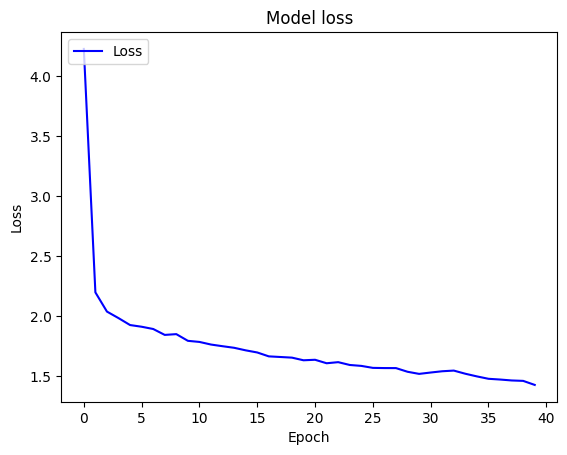

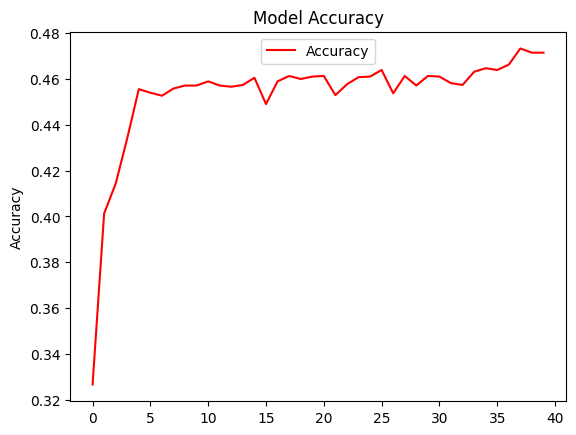

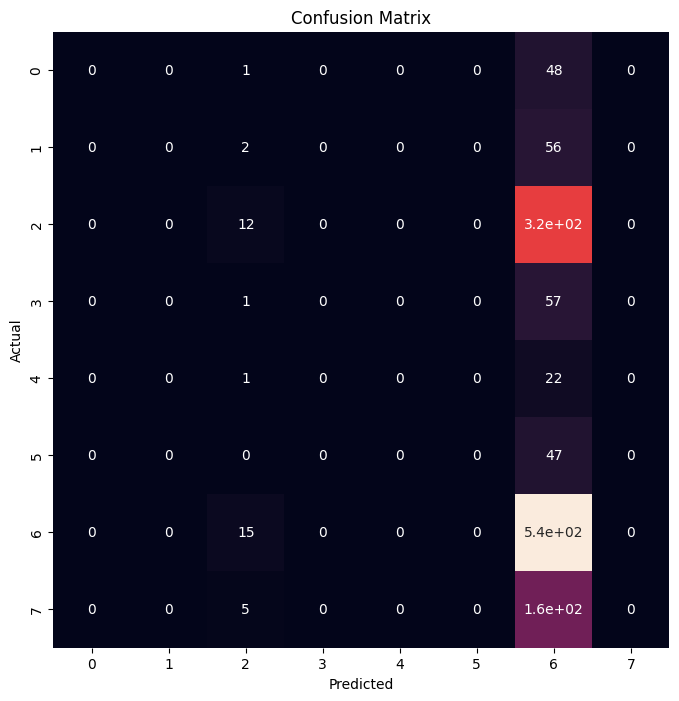

In [9]:
from ssl import PROTOCOL_TLSv1_2
# -*- coding: utf-8 -*-

import io
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras.utils
import seaborn as sns
from tensorflow import keras
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from PIL import Image
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

path = "/content/drive/MyDrive/Colab-Notebooks/IN3062-Introduction-to-AI"

filename_read = os.path.join(path, "full_df.csv")
df = pd.read_csv(filename_read)
# print(df[0:6392])

df = pd.read_csv(filename_read, na_values=['NA', '?'])

headers = list(df.columns.values)
fields = []

for field in fields:
    print(field)

# Shows before an after drop of columns to show what we had and what we are using for the model
# print(f"before drop: {df.columns}")
df.drop('ID',axis=1, inplace=True)
df.drop('N',axis=1, inplace=True)
df.drop('D',axis=1, inplace=True)
df.drop('G',axis=1, inplace=True)
df.drop('C',axis=1, inplace=True)
df.drop('A',axis=1, inplace=True)
df.drop('H',axis=1, inplace=True)
df.drop('M',axis=1, inplace=True)
df.drop('O',axis=1, inplace=True)
df.drop('Left-Fundus',axis=1, inplace=True)
df.drop('Right-Fundus',axis=1, inplace=True)
df.drop('Left-Diagnostic Keywords',axis=1, inplace=True)
df.drop('Right-Diagnostic Keywords',axis=1, inplace=True)
df.drop('filepath',axis=1, inplace=True)
df.drop('target',axis=1, inplace=True)
df.drop('Patient Age', axis=1,inplace=True)
df.drop('Patient Sex', axis=1,inplace=True)
# print(f"after drop: {df.columns}")
# print(df[0:6392])
# print(df.head())

# Trimming down larger groups to prevent skewing of data towards larger classes -NOT TO BE USED, MAKES DATASET TOO SMALL
# print(df['labels'].value_counts())
# N_to_delete = 2573
# N_del_num = 0
# O_to_delete = 408
# O_del_num = 0
# D_to_delete = 1308
# D_del_num = 0
# for i in range(0, len(df)):
#   if N_del_num == N_to_delete:
#     break
#   if df['labels'][i] == 'N':
#     df = df.drop(i)
#     N_del_num += 1

# df.reset_index(drop=True, inplace=True)

# for i in range(0, len(df)):
#   if D_del_num == D_to_delete:
#     break
#   if df['labels'][i] == 'D':
#     df = df.drop(i)
#     D_del_num += 1

# df.reset_index(drop=True, inplace=True)

# for i in range(0, len(df)):
#   if O_del_num == O_to_delete:
#     break
#   if df['labels'][i] == 'O':
#     df = df.drop(i)
#     O_del_num += 1

# df.reset_index(drop=True, inplace=True)

# print(df['labels'].value_counts())

# Reshaping images
width = 128
height = 128
def preprocess_image(file_paths, is_training=True):
    images = []
    data_aug = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        zoom_range=0.2,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    for file_path in file_paths:
        full_path = '/content/drive/MyDrive/Colab-Notebooks/IN3062-Introduction-to-AI/images/' + file_path
        # Load and preprocess image
        #print("Opening"+full_path)
        img = Image.open(full_path)
        img = img.resize((width, height))
        img_array = np.array(img)
        # Augment data with data_aug
        if is_training:
          img_array = data_aug.random_transform(img_array)
          img_array = img_array/255
          images.append(img_array)
        else:
          img_array = np.array(img)/255
    return np.array(images)

# Code for Splitting preprocessed data:
# TOTAL = 6391 separate rows of data we want approx a 60:20:20 split Training:Validation:Test
# Training = 3835 out of 6391 rows
# Validation = 1278 out of 6391 rows
# Test = 1278 out of 6391 rows

# Prepping test train split for x and y
X = df.filename
y = df.labels
X_train_processed = preprocess_image(X)
lab_enc= LabelEncoder()
y_enc = lab_enc.fit_transform(y)
y = tf.keras.utils.to_categorical(y_enc)
# Split our data into 60/20/20:train/val/test
X_train, X_test_temp, y_train, y_test_temp = train_test_split(X_train_processed,y,test_size=0.4)
X_val, X_test, y_val, y_test = train_test_split(X_test_temp,y_test_temp,test_size=0.5)

# result = (X_train_processed[:1])
#np.set_printoptions(threshold=np.inf)
# print(result)

# SMOTE Code for balancing data (NEED Data splitting first)
# Code provided by https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/
#smote_count = Counter(y_train)
#print ('Before', smote_count)# Show the count before smote
# smt = SMOTE()
# X_train, y_train = smt.fit_resample(X_train, y_train)
#post_smote_count = Counter(y_train_smt)
#print('After', post_smote_count)

# non-Functioning SMOTE code
# X_train_processed_flat = X_train.reshape(X_train.shape[0], -1)
# smt = SMOTE()
# X_train, y_train = smt.fit_resample(X_train_processed_flat, y_train)

#4. preparing to build the network

batch_size = 128
num_classes = 8
epochs = 32
save_dir = './'
model_name = 'keras_lfw_trained_model.h5'

# If using model, uncomment these lines
# model = Sequential()
# model.add(Conv2D(32, kernel_size=(3, 3), strides=1, padding='same', input_shape= (128, 128, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())
# model.add(Dense(128))
# model.add(Activation('relu'))
# model.add(Dense(num_classes))
# model.add(Activation('softmax'))

# model.compile(loss='categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

# model.summary()

# If using model2, uncomment these lines
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3,3), activation='relu', strides=1, kernel_regularizer=regularizers.l2(0.002), padding='same', input_shape=(width,height,3)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(64, kernel_size=(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.002), strides=1,padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(128, kernel_size=(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.002),strides = 1, padding = 'same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(Dropout(0.4))
model2.add(Dense(num_classes))
model2.add(Activation('softmax'))

#Potential Optimisers, SGD, Adam or RMSprop
custom = tf.keras.optimizers.Adam(learning_rate=0.001)
#custom = tf.keras.optimizers.SGD(learning_rate=0.0015,momentum=0.99)
#custom = tf.keras.optimizers.RMSprop(learning_rate=0.001,rho=0.9)
model2.compile(loss='categorical_crossentropy',
              optimizer= custom,
              metrics=['accuracy'])
model2.summary()

history = model2.fit(X_train,y_train,verbose=1,epochs=40, batch_size=128,validation_data=(X_val,y_val))

#5. make predictions

# If using model, uncomment this line
#pred = model.predict(X_test)
# If using model2, uncomment this line
pred = model2.predict(X_test)

pred = np.argmax(pred,axis=1)
y_compare = np.argmax(y_test,axis=1)
score = metrics.accuracy_score(y_compare, pred)
confus_mat = confusion_matrix(y_compare,pred)
print("Accuracy score: {}".format(score))

#6. plot data

#print(history.history.keys())
plt.figure(1)
plt.plot(history.history['loss'],color = 'blue')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss'],loc='upper left')
plt.show()

plt.figure(2)
plt.plot(history.history['accuracy'],color='red')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.legend(['Accuracy'], loc='upper center')
plt.show()
#7. add confusion matrix to testing data

plt.figure(3,figsize=(8,8))
sns.heatmap(confus_mat, square=True, annot=True, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# look layer by layer using activation maps for model analysis

#recommended = CNN's | SVM's | KNN's | accuracy matrix